In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import kornia as K
import cv2

from skimage import io, filters, color
from skimage.filters import meijering, sato, frangi, hessian

from pycharm.riskiano.source.transforms.general import * #RandomApply

In [3]:
### show function

def show_img(img: torch.Tensor, size: [int, int]):
    img_np: np.ndarray = K.tensor_to_image(img)
    
    plt.figure(figsize = size)
    plt.imshow(img_np)
    plt.axis('off')

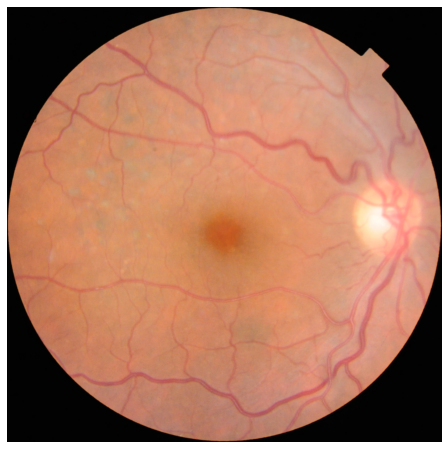

In [4]:
### import image

image: np.ndarray = cv2.imread('/data/project/retina/RIADD/all_cropped_margins/RIADD2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

img: torch.Tensor = K.image_to_tensor(image, keepdim=False)
img = img.float() / 255.
show_img(img, (8,8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


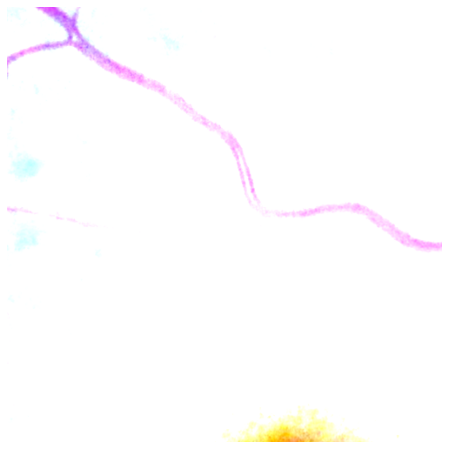

In [4]:
### original augmentation

transforms_list1 = torch.nn.Sequential(
        K.augmentation.RandomCrop(size=(500, 500),
                                  return_transform=False),
        RandomApply(K.augmentation.ColorJitter(0.33, 0.1, 0.1, 0.01), p=.3),
        K.augmentation.RandomHorizontalFlip(p=0.33, return_transform=False),
        K.augmentation.RandomVerticalFlip(p=0.33, return_transform=False),
        RandomApply(K.augmentation.GaussianBlur((15, 15), (2.0, 2.0)), p=.2),
        K.augmentation.CenterCrop((500, 500),
                                  return_transform=False),
        K.augmentation.Normalize(
            mean=torch.Tensor([0.5406, 0.3311, 0.1928]),
            std=torch.Tensor([0.2499, 0.1640, 0.1260])  # RETINA
        )
    )

original = transforms_list1(img)

show_img(original, (8,8))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


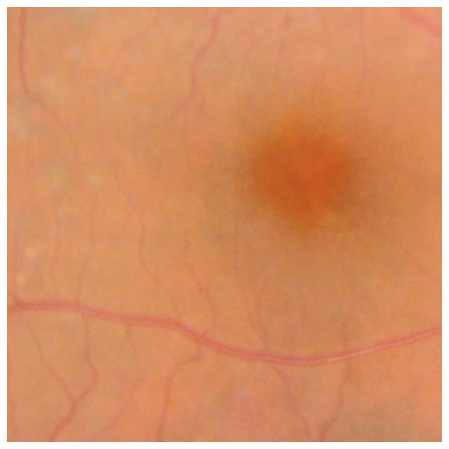

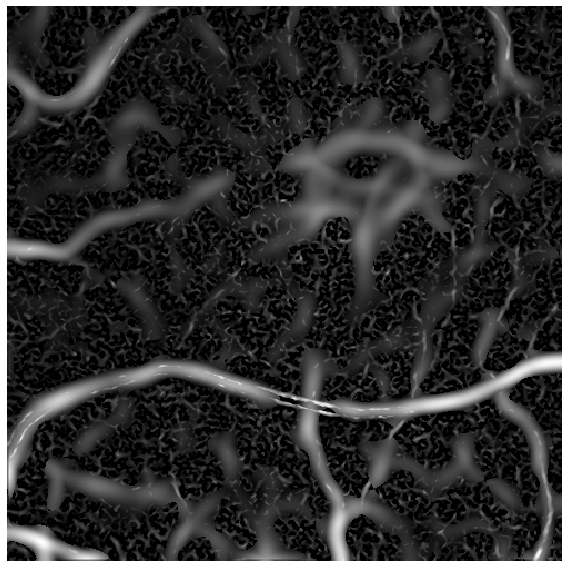

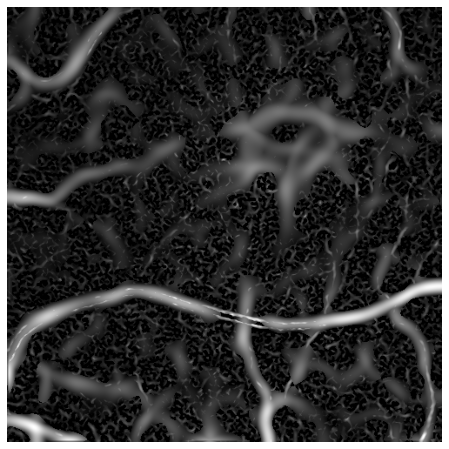

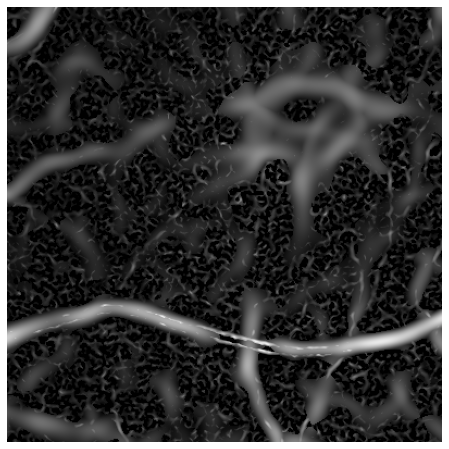

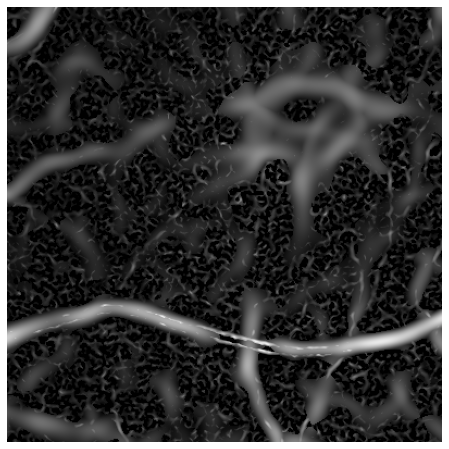

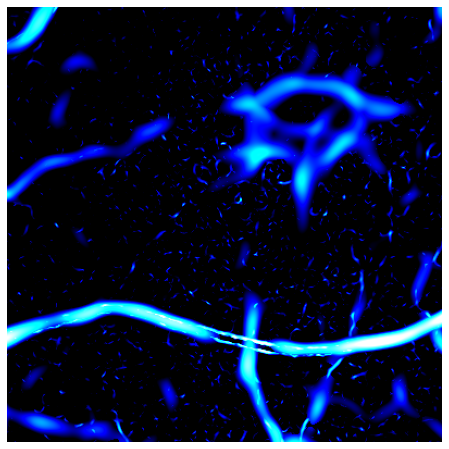

In [9]:
### augmentation with meijering 1 split up

mei1_rc = K.augmentation.RandomCrop(size=(500, 500), return_transform=False)
show_img(mei1_rc(img), (8,8))
img_rc: torch.Tensor = mei1_rc(img)
show_img(img_rc, (8,8))

mei1_hor = K.augmentation.RandomHorizontalFlip(p=0.33, return_transform=False)
img_hor: torch.Tensor = mei1_hor(img_rc)
# show_img(img_hor, (8,8))

mei1_ver = K.augmentation.RandomVerticalFlip(p=0.33, return_transform=False)
img_ver: torch.Tensor = mei1_ver(img_hor)
# show_img(img_ver, (8,8))

mei1_gray = K.augmentation.RandomGrayscale(p=1.)
img_gray: torch.Tensor = mei1_gray(img_ver)
# show_img(img_gray, (8,8))

imagem1 = K.tensor_to_image(img_gray)
imagem2 = filters.meijering(imagem1, sigmas = [1, 10, 2], mode = 'reflect')
# io.imshow(imagem2)
img1: torch.Tensor = K.image_to_tensor(imagem2, keepdim=False)
show_img(img1, (8,8))

# img_mei = img1.float() / 255.
# show_img(img_mei, (8,8))

mei1_cc = K.augmentation.CenterCrop((400, 400), return_transform=False)
show_img(mei1_cc(img1), (8,8))
img_cc: torch.Tensor = mei1_cc(img1)
show_img(img_cc, (8,8))

mei1_norm = K.augmentation.Normalize(mean=torch.Tensor([0.5406, 0.3311, 0.1928]), std=torch.Tensor([0.2499, 0.1640, 0.1260]))
img_norm: torch.Tensor = mei1_norm(img_cc)
show_img(img_norm, (8,8))

In [5]:
### augmentation with meijering 1 pipeline

transforms_mei1 = torch.nn.Sequential(
        K.augmentation.RandomCrop(size=(500, 500),
                                  return_transform=False),
        K.augmentation.RandomHorizontalFlip(p=0.33, return_transform=False),
        K.augmentation.RandomVerticalFlip(p=0.33, return_transform=False),
        K.augmentation.RandomGrayscale(p=1.),
        K.image_to_tensor(filters.meijering(, sigmas = [1, 10, 2], mode = 'reflect')),
        K.augmentation.CenterCrop((500, 500),
                                  return_transform=False),
        K.augmentation.Normalize(
            mean=torch.Tensor([0.5406, 0.3311, 0.1928]),
            std=torch.Tensor([0.2499, 0.1640, 0.1260])  # RETINA
        )
    )

mei1 = transforms_mei1(img)

show_img(mei1, (8,8))

TypeError: descriptor 'numpy' of 'torch._C._TensorBase' object needs an argument